In [8]:
import os
import json
import pandas as pd
import pickle
imgdir = '../data/raw/train/images'
annodir = '../data/raw/train/annotations'
from os.path import join, normpath
assert os.path.exists(imgdir)
assert os.path.exists(annodir)

import matplotlib

# Overview over Kaggle Chart Dataset

In [9]:
file_list = os.listdir(annodir)
ids = []
chart_types = []
sources = []
for file in file_list:
    afile = os.path.join(annodir,file)
    assert os.path.exists(afile)
    dat = None
    with open(afile, 'r') as f:
        dat = json.load(f)
    # print(list(dat.keys()))
    chart_types.append(dat['chart-type'])
    ids.append(file[:-4])
    sources.append(dat['source'])
df = pd.DataFrame(data={'ID':ids,'Type':chart_types, 'Source':sources})
print(df['Type'].value_counts())

line              24940
vertical_bar      19189
scatter           11236
dot                5131
horizontal_bar       73
Name: Type, dtype: int64


## Frequency of Different Chart Types

<Axes: >

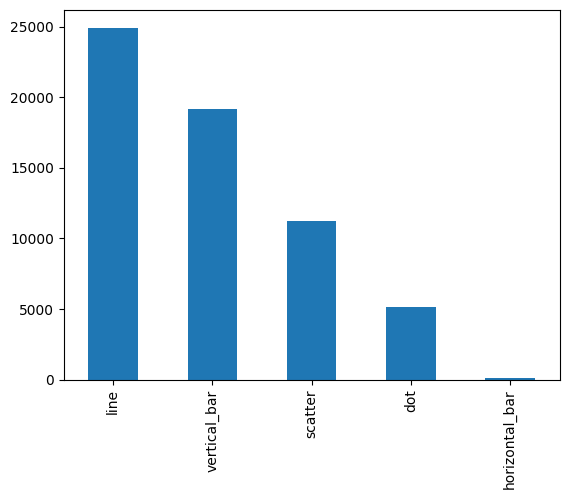

In [10]:
# !pip install matplotlib
df['Type'].value_counts().plot(kind='bar')

## Data Sources

<Axes: >

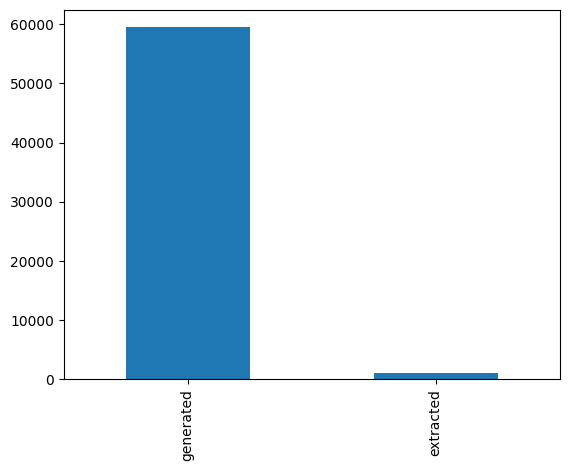

In [11]:
# !pip install matplotlib
df['Source'].value_counts().plot(kind='bar')

In [14]:
ANNODIR = '../data/interim/train/annotations'
TRAINDIR = '../data/processed/train'
yfile = join(TRAINDIR, 'axislabelbounds_y_train.pkl')
with open(yfile,'rb') as f:
    Y = pickle.load(f)
ydf = pd.DataFrame(Y,columns=['HorizLeft','HorizTop','HorizRight','HorizBottom',
                                'VertLeft','VertTop','VertRight','VertBottom'])
print(ydf)

       HorizLeft  HorizTop  HorizRight  HorizBottom  VertLeft   VertTop  \
0       0.222664  0.889213    0.962227     0.921283  0.061630  0.172012   
1       0.175214  0.705036    0.946581     0.978417  0.061966  0.115108   
2       0.103594  0.859259    0.991543     0.903704  0.031712  0.055556   
3       0.171717  0.674556    0.945455     0.985207  0.084848  0.159763   
4       0.152263  0.856140    0.989712     0.901754  0.076132  0.217544   
...          ...       ...         ...          ...       ...       ...   
60564   0.149893  0.712766    0.963597     0.886525  0.059957  0.187943   
60565   0.139676  0.874046    0.991903     0.916031  0.052632  0.125954   
60566   0.205179  0.859238    0.952191     0.903226  0.107570  0.114370   
60567   0.171875  0.861592    0.943359     0.896194  0.095703  0.093426   
60568   0.140389  0.741135    0.969762     0.975177  0.043197  0.145390   

       VertRight  VertBottom  
0       0.091451    0.874636  
1       0.126068    0.730216  
2     

In [22]:
# !pip install seaborn
import seaborn as sns

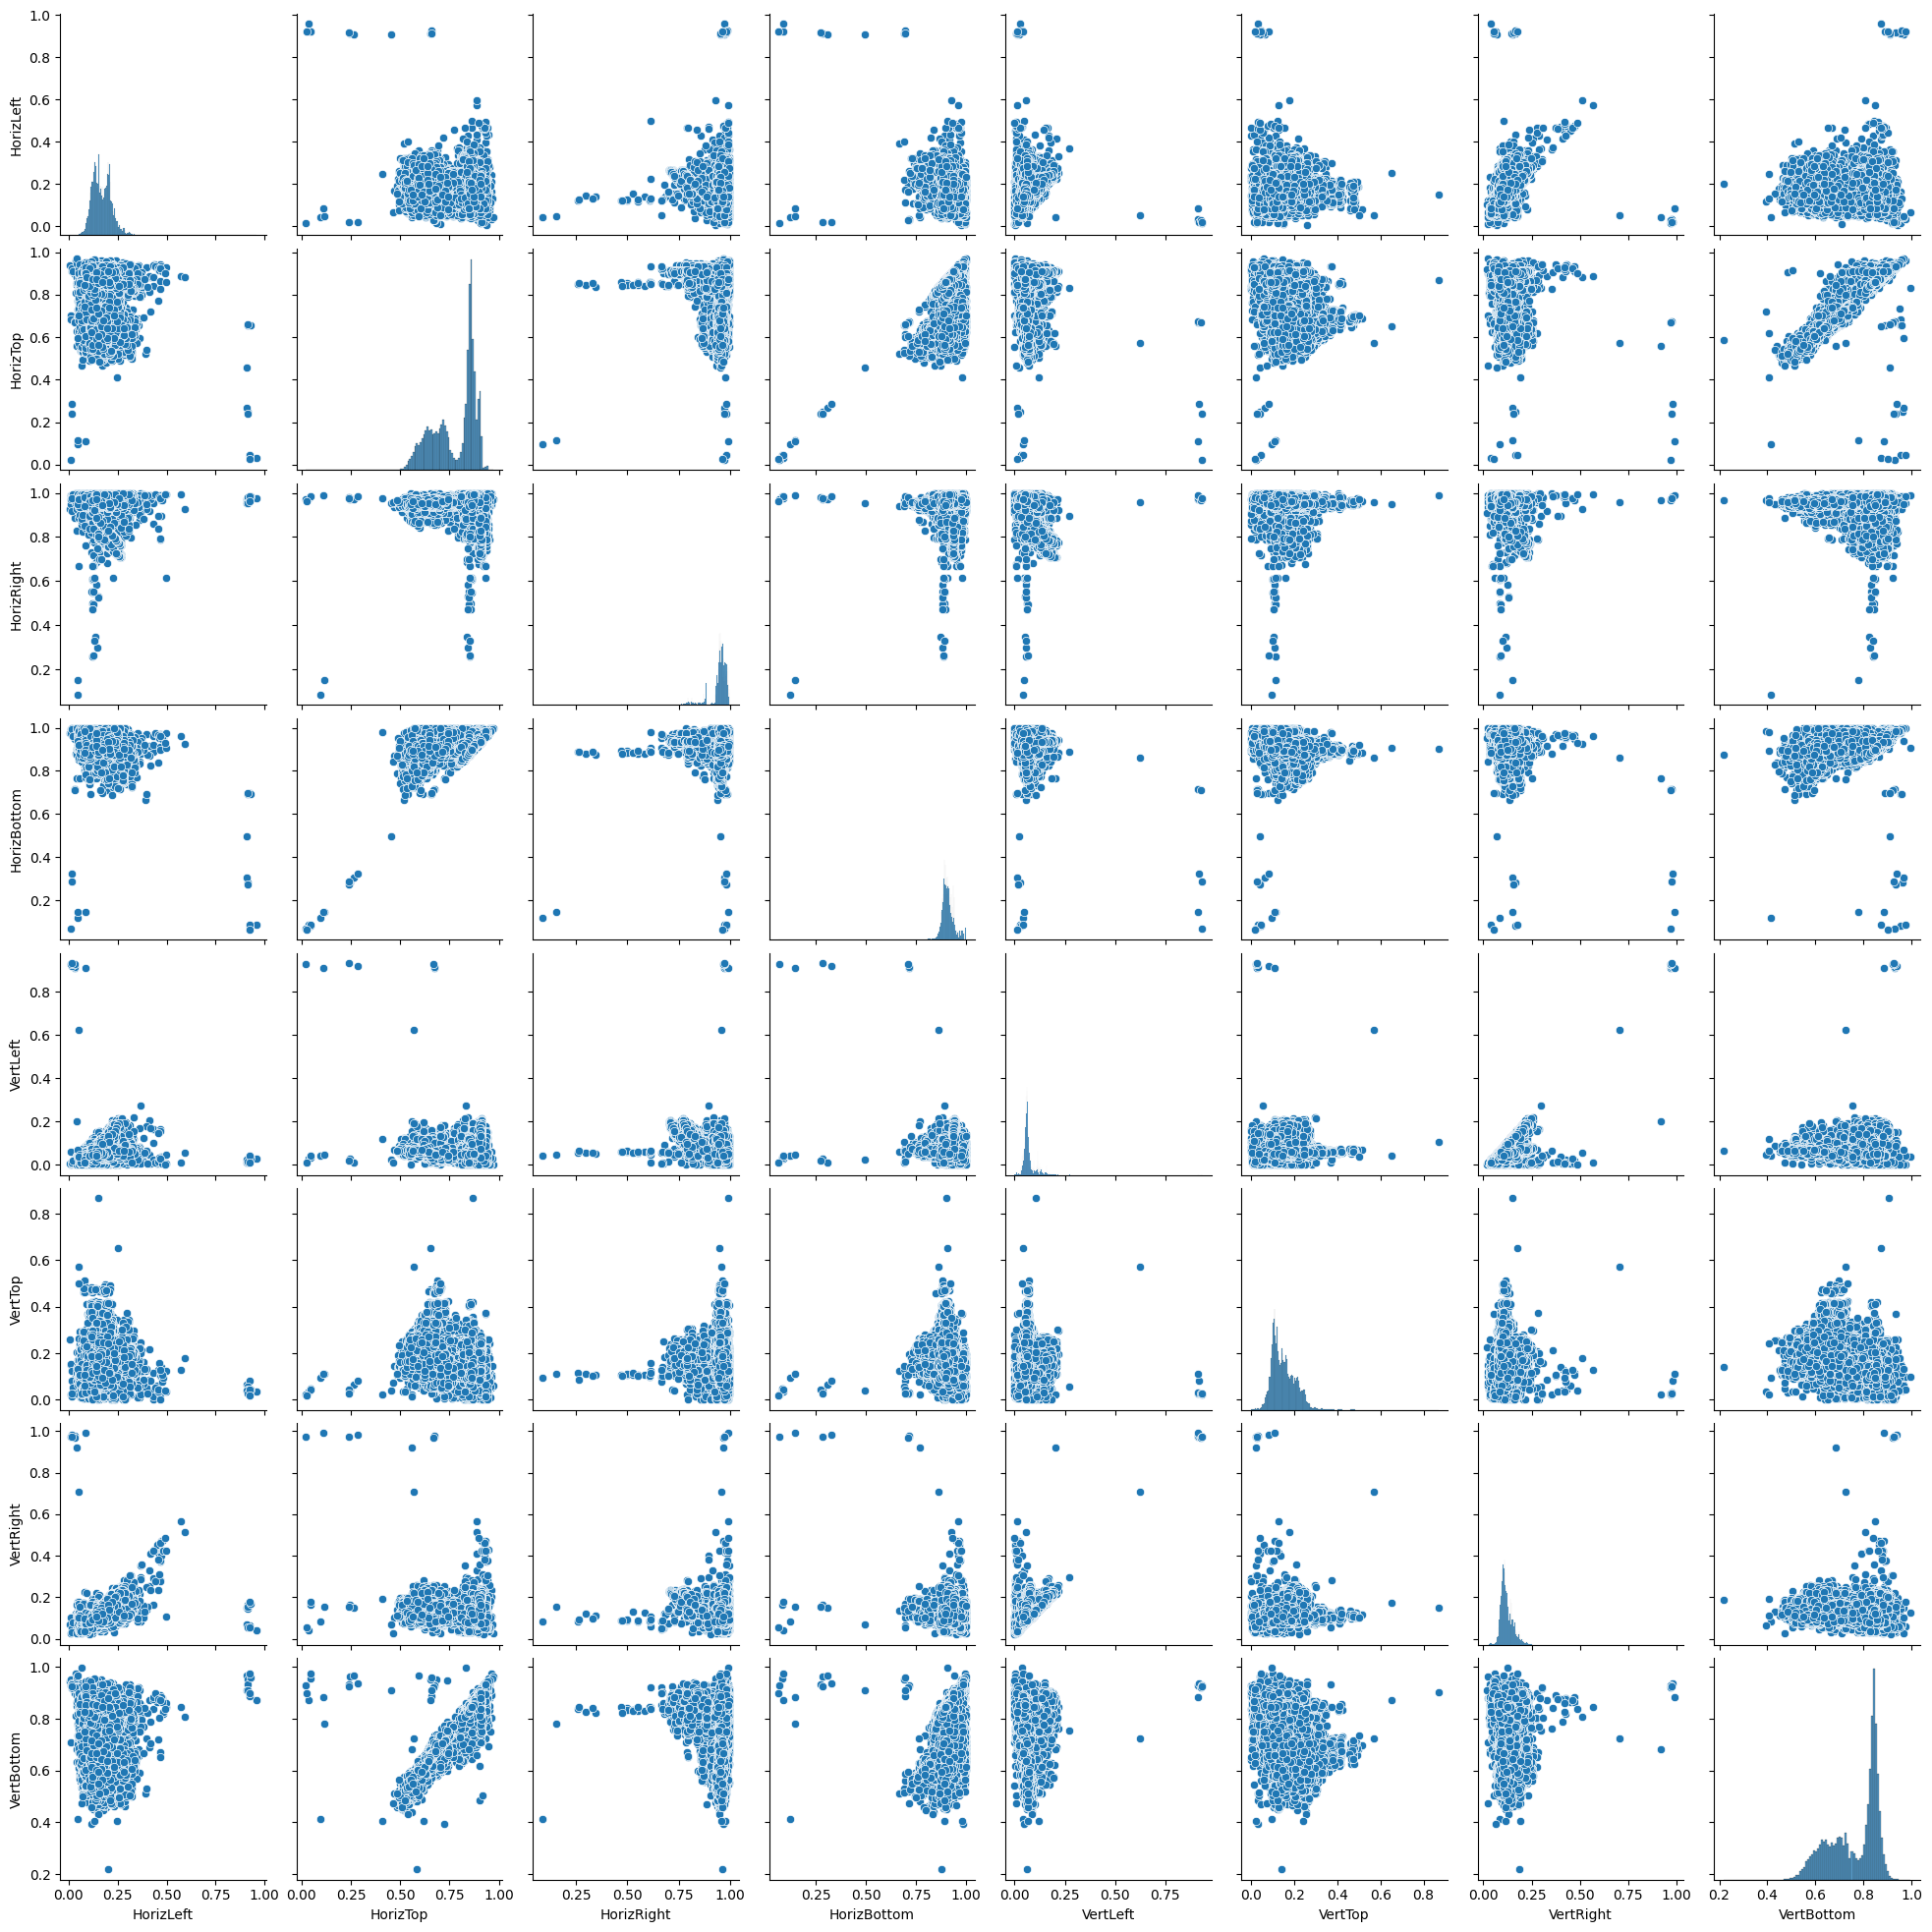

In [18]:
sns.pairplot(ydf)

X-axis: Minimum y-coordinate of horionztal axis:

In [20]:
print(ydf['HorizTop'].min())

0.021791767554479417


Maximum x-coordinate of y-axis:

In [21]:
print(ydf['VertRight'].min())

0.019646365422396856


In other words, for the y-axis we only need to examine the left 20% of the image; for the x axis we only need to examing the bottom 22% of the image